<a href="https://colab.research.google.com/github/Akbar453/Wine-Quality-Prediciton/blob/main/Wine_Quality_Prediction_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the file from the given dataset**

In [2]:
data =pd.read_csv('/content/winequality-red.csv')

**Visualization of top 10 records inside my data**

In [4]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Classes of target value - quality**

In [5]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

**Description of the given dataset**

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**To check the missing values**

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Correlation  Matrix among all features inside the dataset**

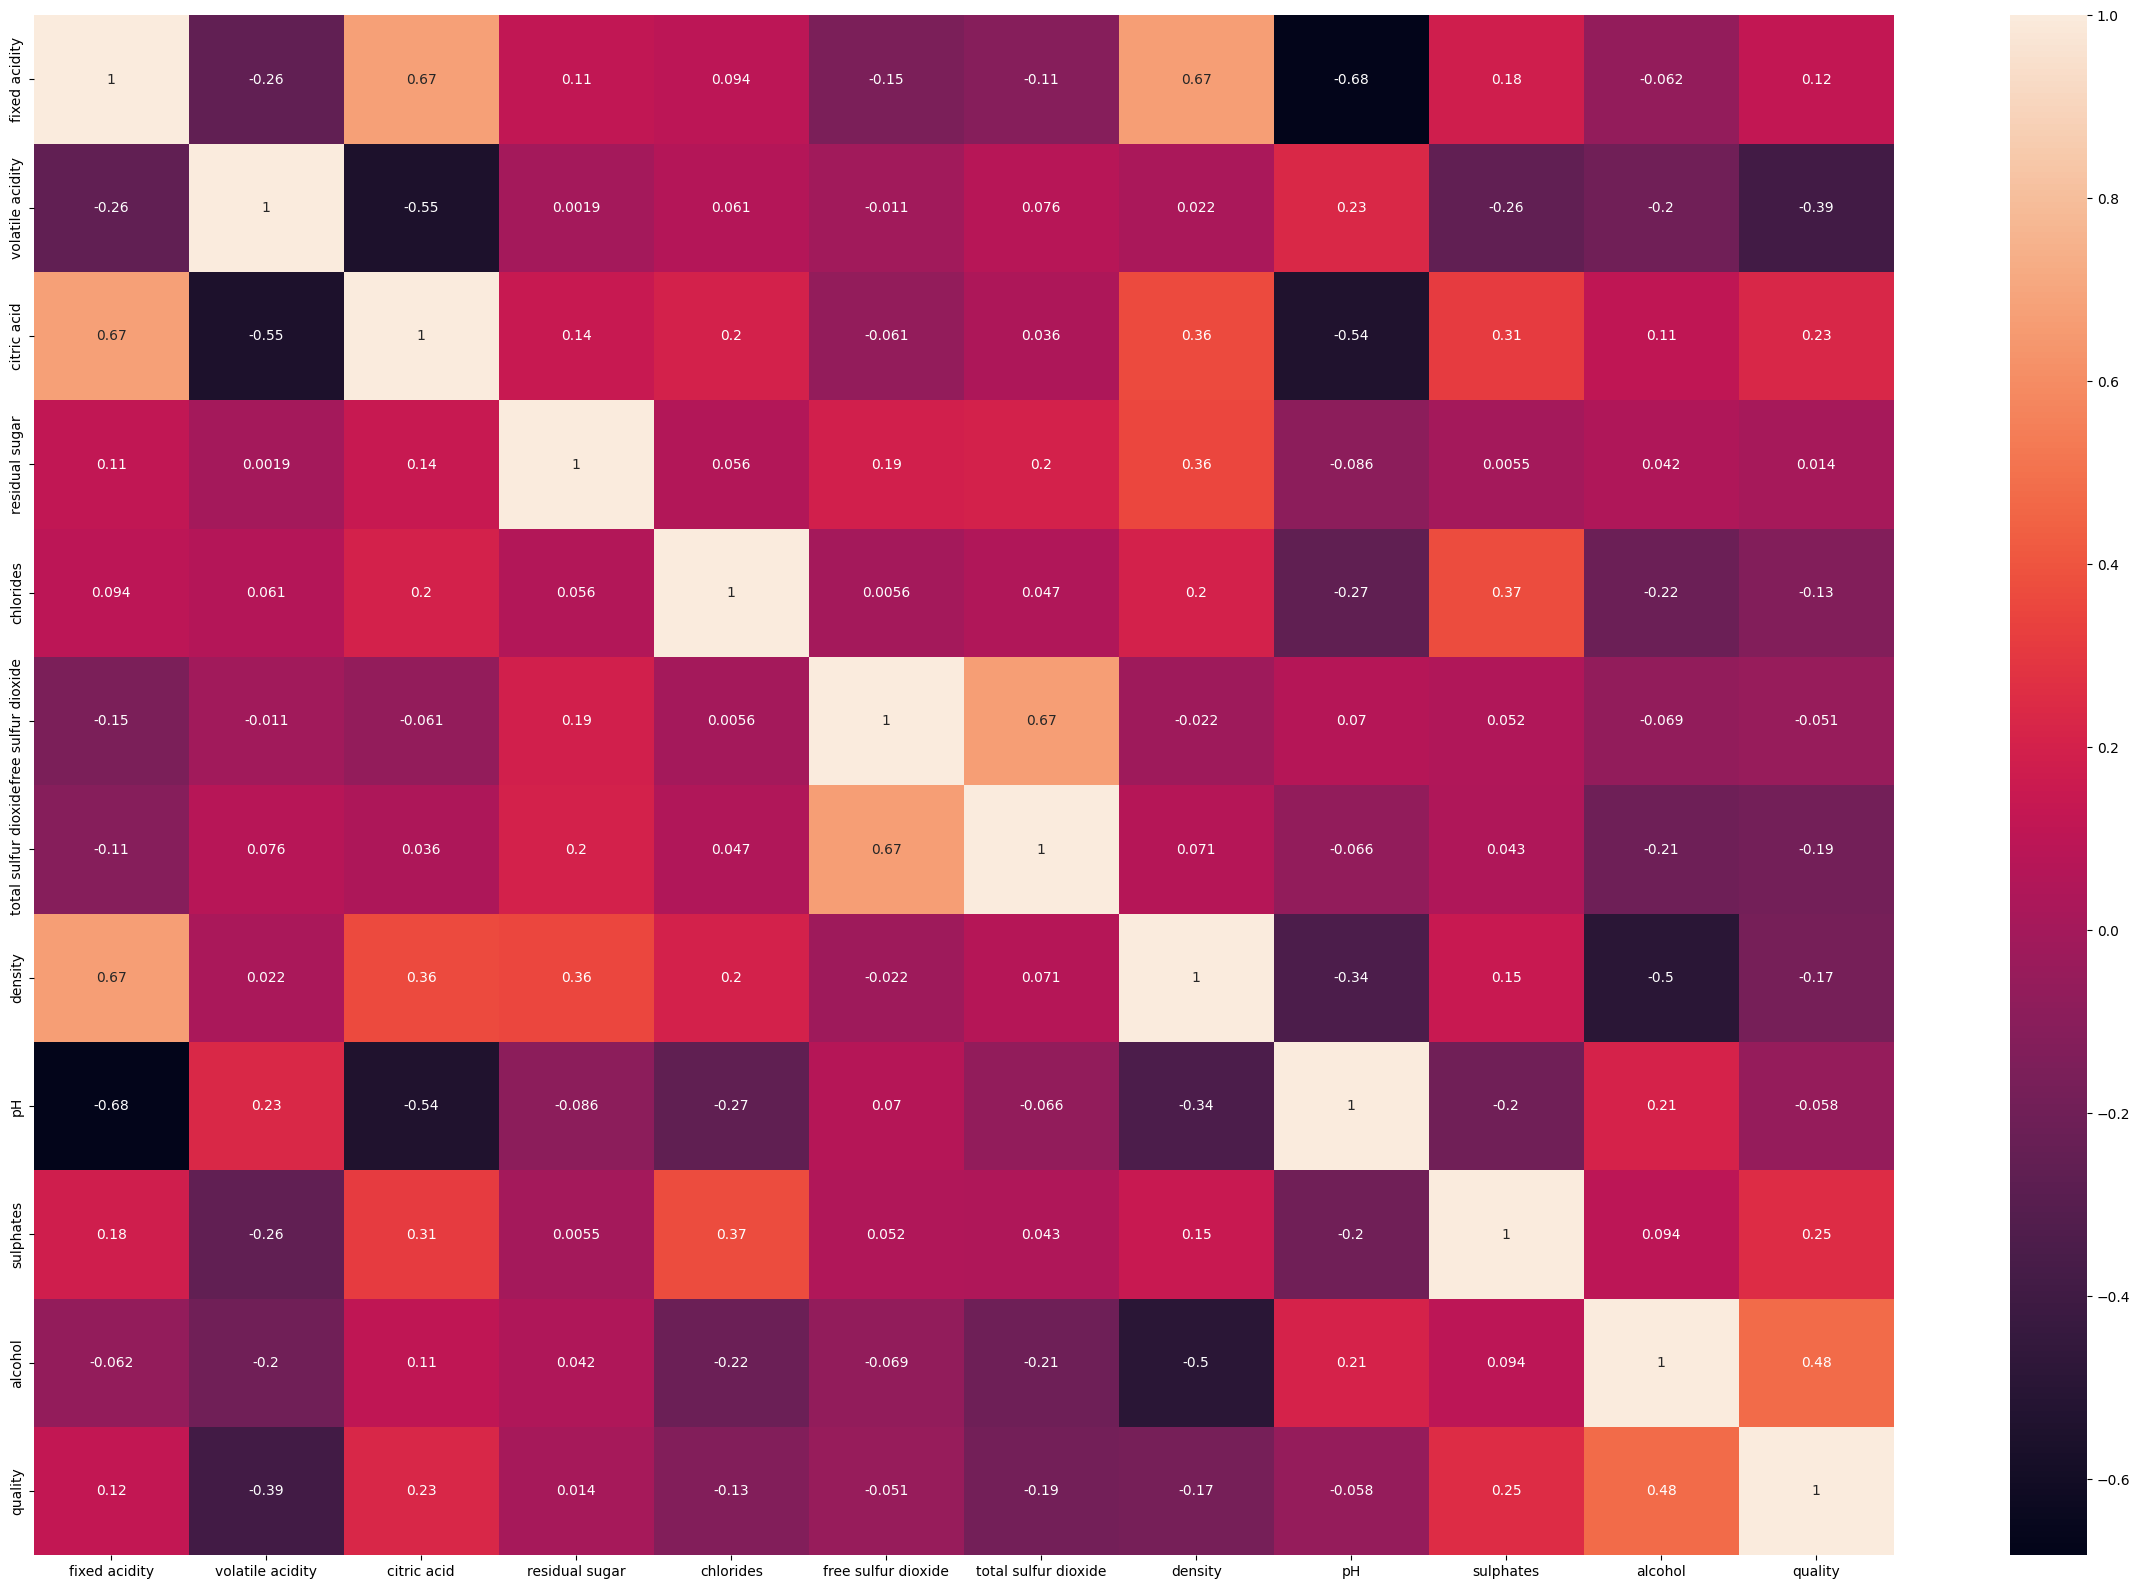

In [14]:
plt.figure(figsize=(30,20))
corr =data.corr()
sns.heatmap(corr, annot=True)
plt.savefig("Correlation Matrix.png")
plt.show()


**Detection of outliers using z-score**

In [15]:
from scipy import stats
z= np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

**z >3(Threshold) -> This is an outlier**

In [16]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

**Remove those records whose z >3**

In [17]:
new_data = data[(z<3).all(axis=1)]

In [18]:
new_data.shape

(1451, 12)

In [19]:
data.shape

(1599, 12)

**Data Splitting into features(X) and  target column(y)**

In [20]:
from sklearn.model_selection import train_test_split
X = new_data.drop(columns = 'quality')## X is the input feature
y = new_data['quality']## y is the outcome

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [22]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Data Modeling using Random Forest Classifier**

In [42]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classificationModel =RandomForestClassifier(n_estimators = 100, random_state=42)

In [43]:
rf_classificationModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Prediction of data using Random Forest model**

In [44]:
y_pred = rf_classificationModel.predict(X_test)


In [45]:
y_pred

array([6, 5, 6, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       7, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 6, 5, 5, 7, 7, 5, 6,
       7, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 7, 5, 6, 7,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 5, 7,
       5, 6, 5, 6, 6, 5, 6, 5, 7, 5, 6, 7, 6, 6, 5, 5, 5, 8, 5, 6, 6, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5,
       5, 7, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5, 5,
       6, 6, 6, 6, 5])

**Data Evaluation on metrics**

In [46]:
from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.6804123711340206


Accuracy Score : 68%

**Hyperparameter Tuning** -> GridSearchCV

In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=rf_classificationModel, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


**Retrain with the best parameters**

In [49]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                       random_state=42)

**Repredict the best model**

In [50]:
best_y_pred = best_rf_model.predict(X_test)

**Re-evaluate the best model**

In [51]:
best_accuracy = metrics.accuracy_score(y_test, best_y_pred)
print('Best Accuracy Score after hyperparameter tuning:', best_accuracy)

Best Accuracy Score after hyperparameter tuning: 0.697594501718213


[Text(0.47311176430143015, 0.975, 'x[9] <= 0.645\ngini = 0.627\nsamples = 737\nvalue = [30, 532, 443, 147, 8]'),
 Text(0.2171256188118812, 0.925, 'x[1] <= 0.405\ngini = 0.538\nsamples = 443\nvalue = [25, 420, 232, 31, 0]'),
 Text(0.07590759075907591, 0.875, 'x[7] <= 0.997\ngini = 0.6\nsamples = 75\nvalue = [4, 51, 64, 12, 0]'),
 Text(0.0462046204620462, 0.825, 'x[4] <= 0.08\ngini = 0.581\nsamples = 41\nvalue = [4, 14, 41, 10, 0]'),
 Text(0.0352035203520352, 0.775, 'x[8] <= 3.425\ngini = 0.632\nsamples = 24\nvalue = [4, 14, 22, 4, 0]'),
 Text(0.026402640264026403, 0.725, 'x[10] <= 11.65\ngini = 0.546\nsamples = 22\nvalue = [0, 11, 22, 4, 0]'),
 Text(0.022002200220022004, 0.675, 'x[10] <= 10.75\ngini = 0.622\nsamples = 13\nvalue = [0, 11, 9, 4, 0]'),
 Text(0.0176017601760176, 0.625, 'x[4] <= 0.078\ngini = 0.495\nsamples = 11\nvalue = [0, 11, 9, 0, 0]'),
 Text(0.013201320132013201, 0.575, 'x[7] <= 0.996\ngini = 0.459\nsamples = 7\nvalue = [0, 5, 9, 0, 0]'),
 Text(0.0088008800880088, 0.525

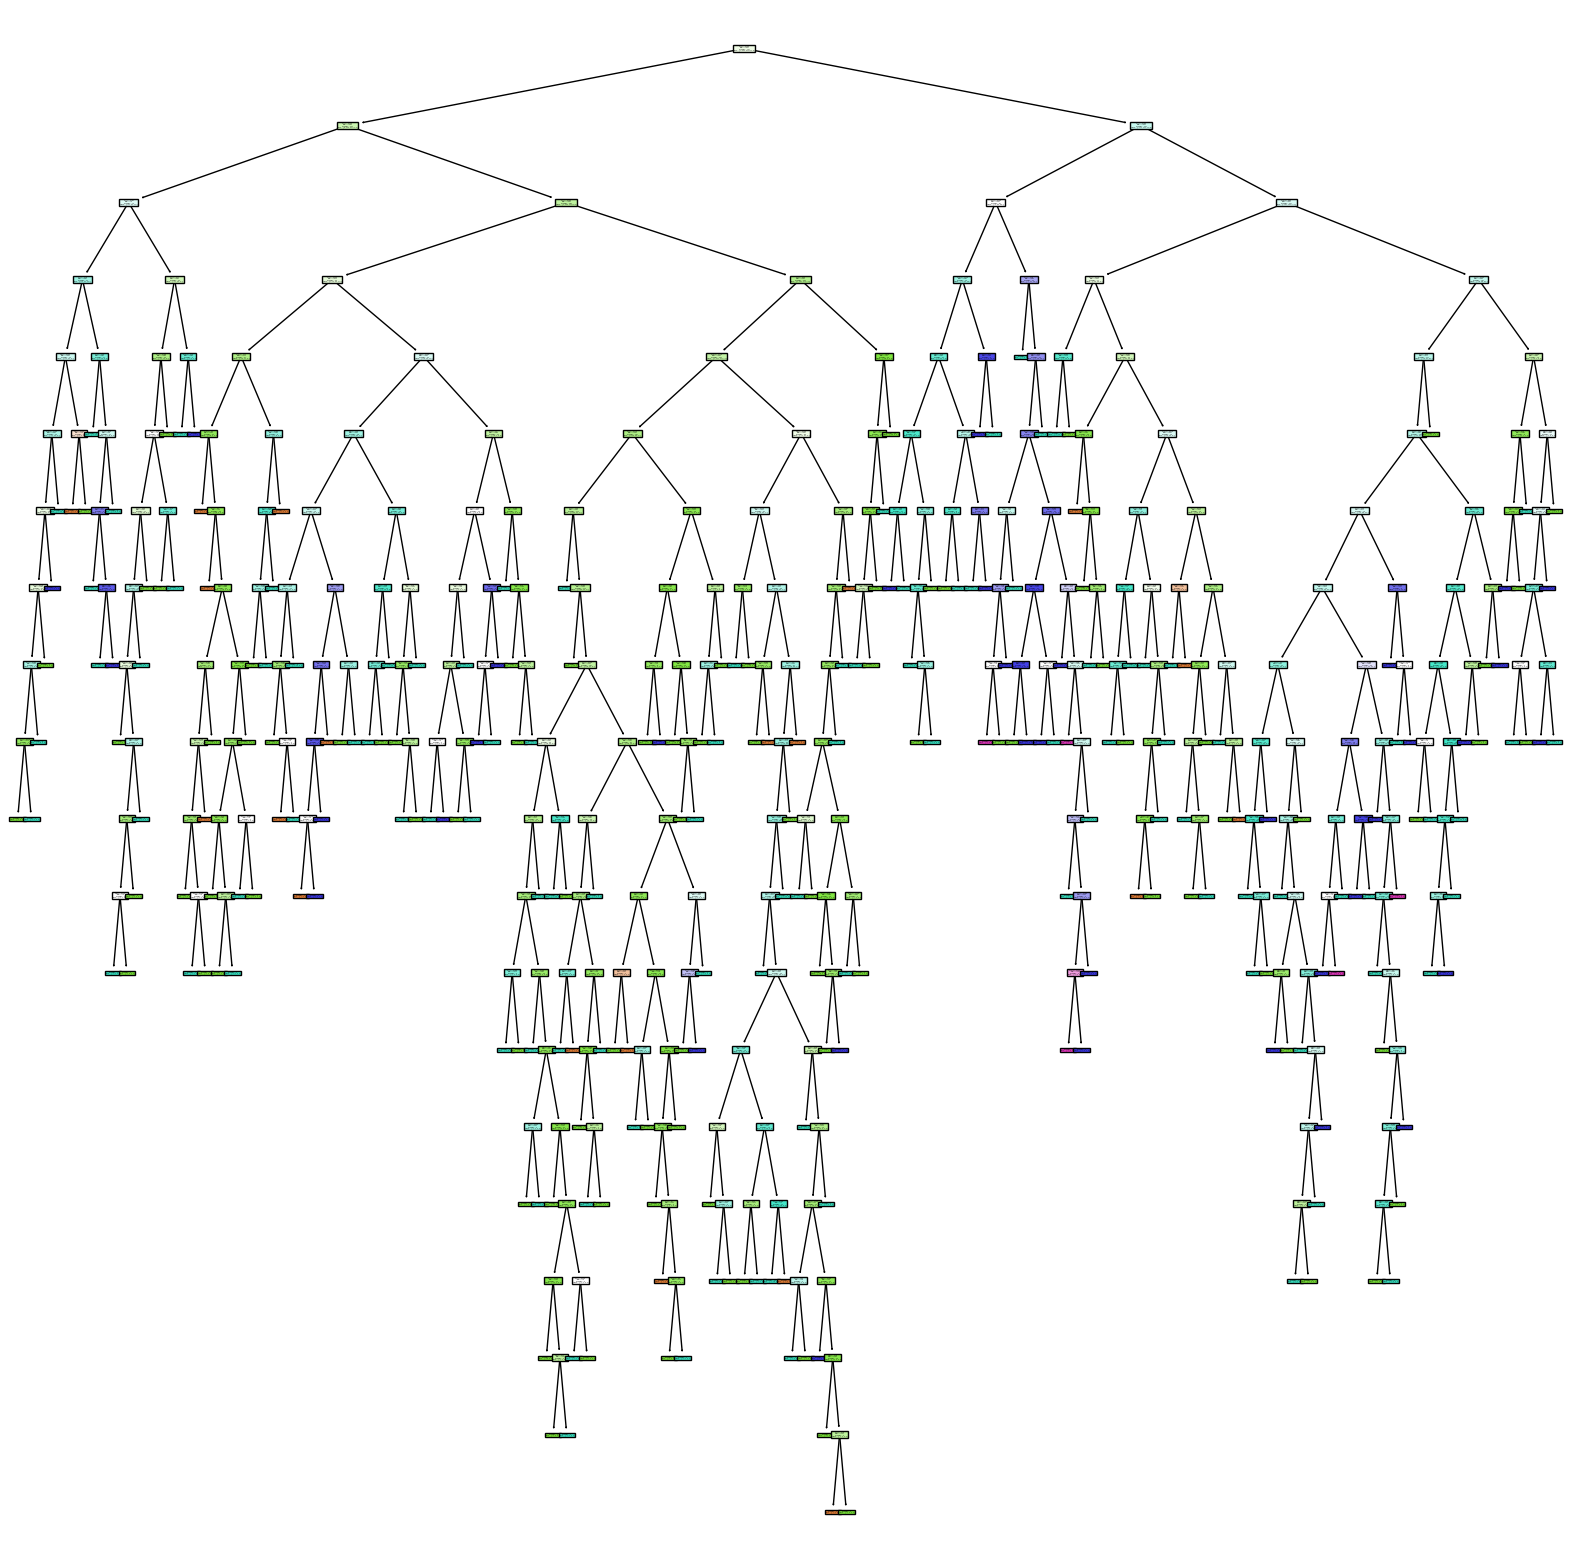

In [35]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled=True)